In [5]:
#import libraries

import pandas as pd
import geopandas as gpd

/Users/hfrahn/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
import cenpy
from cenpy import products

In [3]:
#census tract data
acs = cenpy.products.ACS() 

Variables of interest:
- Median household income: B19013_001E
- Units in housing: DP04_0006E to DP04_00013E

In [18]:
list = []
for i in range(6,14):
    list.append("DP04_000" + str(i) + "E")
print(list)

['DP04_0006E', 'DP04_0007E', 'DP04_0008E', 'DP04_0009E', 'DP04_00010E', 'DP04_00011E', 'DP04_00012E', 'DP04_00013E']


In [6]:
censusDf = products.ACS(year = 'latest').from_state('CA', level='tract',
                                        variables=['DP04_0006E', 'DP04_0007E', 'DP04_0008E', 
                                                   'DP04_0009E', 'DP04_0010E', 'DP04_0011E', 
                                                   'DP04_0012E', 'DP04_0013E', 'B19013_001E' 
                                                   ])


/Users/opheliasin/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/opheliasin/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


KeyError: 'Response from API is malformed. You may have submitted too many queries, formatted the request incorrectly, or experienced significant network connectivity issues. Check to make sure that your inputs, like placenames, are spelled correctly, and that your geographies match the level at which you intend to query. The original error from the Census is:\\n(API ERROR 500:Error performing query operation([]))'

In [10]:
censusDf = products.ACS(year = 2020).from_county('Los Angeles, CA', level='tract',
                                        variables=['DP04_0006E', 'DP04_0007E', 'DP04_0008E', 
                                                   'DP04_0009E', 'DP04_0010E', 'DP04_0011E', 
                                                   'DP04_0012E', 'DP04_0013E', 'B19013_001E' 
                                                   ])


/Users/opheliasin/opt/anaconda3/envs/uds/lib/python3.8/site-packages/cenpy/remote.py:224: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if index is not "":
/Users/opheliasin/opt/anaconda3/envs/uds/lib/python3.8/site-packages/cenpy/remote.py:224: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if index is not "":


KeyError: 'Dataset tigerWMS_ACS2020 not found. Please check cenpy.tiger.available()'

In [8]:
censusDf.head()

,GEOID,geometry,B19013_001E,NAME,state,county,tract
0,06037670328,"POLYGON ((-13183928.750 3998590.110, -13183871...",177857.0,"Census Tract 6703.28, Los Angeles County, Cali...",06,037,670328
1,06037990200,"POLYGON ((-13206496.550 4033174.070, -13206119...",NaN,"Census Tract 9902, Los Angeles County, California",06,037,990200
2,06037670326,"POLYGON ((-13182706.680 4000184.830, -13182626...",155000.0,"Census Tract 6703.26, Los Angeles County, Cali...",06,037,670326
3,06037980013,"POLYGON ((-13179812.820 4019143.240, -13179813...",NaN,"Census Tract 9800.13, Los Angeles County, Cali...",06,037,980013
4,06037602302,"POLYGON ((-13177861.170 4015210.820, -13177860...",126116.0,"Census Tract 6023.02, Los Angeles County, Cali...",06,037,602302


Now let's get the EV data and subset it to just chargers in California.

In [6]:
#have to run this to fix my geopandas for some reason; if yours works don't run it
##solution from https://gis.stackexchange.com/questions/375361/zonal-stats-returns-proj-error
import os
import pyproj as p
os.environ['PROJ_LIB'] = '/Users/hfrahn/opt/anaconda3/envs/uds/bin/pyproj'
p.datadir.set_data_dir('/Users/hfrahn/opt/anaconda3/envs/uds/bin/pyproj')

In [36]:

apiKey = "eCN7llpPT79TmygqmvC71QdnnWdOquoRdnCR1DXo"
requestString = "https://developer.nrel.gov/api/alt-fuel-stations/v1.geojson?api_key={}&fuel_type=ELEC&state=CA".format(apiKey)



chargers = gpd.read_file(requestString)



34.2483191527193

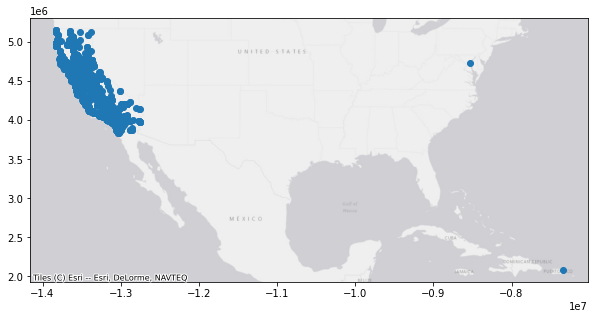

In [37]:
# now let's plot them just to make sure they are in CA
import contextily as ctx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
chargers.to_crs("EPSG:3857").plot(ax=ax)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldGrayCanvas)

In [40]:
#there seems to be a couple that aren't in CA so let's remove those
#https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.cx.html#geopandas.GeoDataFrame.cx
#CA bounding box coordinates:
#31, -112
#42, -126
chargechargers.cx[-126:-112, 31:42]

,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,open_date,...,ng_psi,ng_vehicle_class,access_days_time_fr,intersection_directions_fr,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,ev_network_ids,federal_agency,geometry
0,private,Fleet use only,None,None,2021-07-14,None,ELEC,Private,1517,1999-10-15,...,None,None,None,None,None,Privé,None,None,None,POINT (-118.38797 34.24832)
1,private,None,None,None,2021-07-14,None,ELEC,Private,1519,2020-02-28,...,None,None,None,None,None,Privé,None,None,None,POINT (-118.44850 34.05254)
2,public,24 hours daily; pay lot,None,None,2020-11-09,None,ELEC,Public,1523,1995-08-30,...,None,None,None,None,None,Public,None,None,None,POINT (-118.27139 34.04054)
3,private,For fleet and employee use only,None,None,2021-07-14,None,ELEC,Private,1525,1999-10-15,...,None,None,None,None,None,Privé,None,None,None,POINT (-118.24859 34.05913)
4,private,Fleet use only,None,None,2021-07-14,None,ELEC,Private,1531,2018-05-01,...,None,None,None,None,None,Privé,None,None,None,POINT (-118.09667 33.75980)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14583,public,24 hours daily,None,None,2022-05-10,None,ELEC,Public,217290,2022-05-10,...,None,None,None,None,None,Public,None,"{'station': ['2019'], 'posts': ['89061']}",None,POINT (-118.24052 34.05123)
14584,public,24 hours daily,None,None,2022-05-10,None,ELEC,Public,217293,2022-05-10,...,None,None,None,None,None,Public,None,{'posts': ['AUI-10507']},None,POINT (-118.23238 34.06427)
14585,public,24 hours daily,None,None,2022-05-10,None,ELEC,Public,217294,2022-05-10,...,None,None,None,None,None,Public,None,{'posts': ['AUI-10441']},None,POINT (-118.23238 34.06427)
14586,public,24 hours daily,None,None,2022-05-10,None,ELEC,Public,217296,2022-05-10,...,None,None,None,None,None,Public,None,{'posts': ['AUI-10503']},None,POINT (-118.24388 34.11612)
